- 需求：股票分析
    - 使用tushare包获取某股票历史行情数据
    - 输出该股票所有收盘比开盘3%以上的日期
    - 输出该股票所有开盘比前日收盘跌幅超过2%的日期
    - 加入从2010年1月1日开始，每月第一个交易日买入1手股票，每年最后一个交易日卖出所有股       票，到今天为止，我的收益如何？

 - tushare：财经数据接口包
     - pip install tushare

In [1]:
import tushare as ts
import pandas as pd
from pandas import DataFrame,Series
import numpy as np

In [5]:
#获取某只股票的历史行情数据
#code:字符串形式的股票代码
df = ts.get_k_data(code='600519',start='2000-01-01')
df

本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2


,date,open,close,high,low,volume,code
0,2001-08-27,-91.359,-91.174,-90.778,-91.654,406318.00,600519
1,2001-08-28,-91.274,-90.941,-90.916,-91.341,129647.79,600519
2,2001-08-29,-90.920,-91.027,-90.916,-91.076,53252.75,600519
3,2001-08-30,-91.044,-90.899,-90.826,-91.094,48013.06,600519
4,2001-08-31,-90.890,-90.915,-90.806,-90.952,23231.48,600519
...,...,...,...,...,...,...,...
4907,2022-03-10,1808.000,1794.430,1821.000,1791.000,36462.00,600519
4908,2022-03-11,1766.000,1769.010,1777.000,1718.080,47727.00,600519
4909,2022-03-14,1730.000,1700.000,1750.000,1700.000,49007.00,600519
4910,2022-03-15,1650.000,1603.000,1685.000,1603.000,89056.00,600519


In [6]:
#将互联网上获取的股票数据存储到本地
df.to_csv('./maotai.csv') #调用to_xxx方法将df中的数据写入到本地进行存储

In [7]:
df = pd.read_csv('./maotai.csv')
df.head(10)

,Unnamed: 0,date,open,close,high,low,volume,code
0,0,2001-08-27,-91.359,-91.174,-90.778,-91.654,406318.00,600519
1,1,2001-08-28,-91.274,-90.941,-90.916,-91.341,129647.79,600519
2,2,2001-08-29,-90.920,-91.027,-90.916,-91.076,53252.75,600519
3,3,2001-08-30,-91.044,-90.899,-90.826,-91.094,48013.06,600519
4,4,2001-08-31,-90.890,-90.915,-90.806,-90.952,23231.48,600519
5,5,2001-09-03,-90.881,-90.918,-90.815,-90.943,22112.09,600519
6,6,2001-09-04,-90.915,-90.835,-90.724,-90.938,37006.77,600519
7,7,2001-09-05,-90.808,-90.838,-90.753,-90.879,26066.95,600519
8,8,2001-09-06,-90.854,-90.970,-90.833,-91.003,28997.03,600519
9,9,2001-09-07,-91.005,-91.151,-90.925,-91.156,31552.25,600519


In [ ]:
#需要对读出来的数据进行相关的处理

In [8]:
#删除df中指定的一列,axis=1代表列，true作用到原数据
df.drop(labels='Unnamed: 0',axis=1,inplace=True)

In [9]:
#查看每一列的数据类型
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4912 entries, 0 to 4911
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    4912 non-null   object 
 1   open    4912 non-null   float64
 2   close   4912 non-null   float64
 3   high    4912 non-null   float64
 4   low     4912 non-null   float64
 5   volume  4912 non-null   float64
 6   code    4912 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 268.8+ KB


In [10]:
#将time列转为时间序列类型
df['date'] = pd.to_datetime(df['date'])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4912 entries, 0 to 4911
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    4912 non-null   datetime64[ns]
 1   open    4912 non-null   float64       
 2   close   4912 non-null   float64       
 3   high    4912 non-null   float64       
 4   low     4912 non-null   float64       
 5   volume  4912 non-null   float64       
 6   code    4912 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 268.8 KB


In [12]:
#将date列作为源数据的行索引
df.set_index('date',inplace=True)

In [13]:
df

,open,close,high,low,volume,code
date,,,,,,
2001-08-27,-91.359,-91.174,-90.778,-91.654,406318.00,600519
2001-08-28,-91.274,-90.941,-90.916,-91.341,129647.79,600519
2001-08-29,-90.920,-91.027,-90.916,-91.076,53252.75,600519
2001-08-30,-91.044,-90.899,-90.826,-91.094,48013.06,600519
2001-08-31,-90.890,-90.915,-90.806,-90.952,23231.48,600519
...,...,...,...,...,...,...
2022-03-10,1808.000,1794.430,1821.000,1791.000,36462.00,600519
2022-03-11,1766.000,1769.010,1777.000,1718.080,47727.00,600519
2022-03-14,1730.000,1700.000,1750.000,1700.000,49007.00,600519


In [14]:
#输出该股票所有收盘比开盘上涨3%以上的日期
#伪代码：（收盘-开盘）/开盘 >0.03
(df['open']-df['close'])/df['open']>0.03

#在分析的过程中如果产生了boolean值则下一步马上将布尔值作为源数据的行索引
 #如果布尔值作为df的行索引，则可以取出true对应的行数据，忽略false对应的行索引
df.loc[(df['open']-df['close'])/df['open']>0.03] #获取了True对应的行数据（满足需求的行数据）

df.loc[(df['open']-df['close'])/df['open']>0.03].index #df的行数据

DatetimeIndex(['2006-05-29', '2006-06-12', '2006-10-09', '2006-10-25',
               '2006-11-14', '2006-11-16', '2006-11-29', '2006-11-30',
               '2006-12-11', '2006-12-14',
               ...
               '2021-07-26', '2021-07-27', '2021-07-29', '2021-08-17',
               '2021-08-26', '2021-10-18', '2021-12-29', '2022-01-13',
               '2022-01-28', '2022-03-07'],
              dtype='datetime64[ns]', name='date', length=680, freq=None)

In [15]:
#输出该股票所有开盘比前日收盘跌幅超过2%的日期
#伪代码：（开盘-前日收盘）/前日收盘 <0.02
(df['open'] - df['close'].shift(1))/df['close'].shift(1) < -0.02
#将布尔值作为源数据的行索引取出True对应的行数据
df.loc[(df['open'] - df['close'].shift(1))/df['close'].shift(1) < -0.02].index

DatetimeIndex(['2006-02-13', '2006-04-17', '2006-04-18', '2006-04-19',
               '2006-04-20', '2006-05-25', '2006-05-30', '2006-12-27',
               '2007-01-04', '2007-01-22',
               ...
               '2020-03-13', '2020-03-23', '2020-10-26', '2021-02-26',
               '2021-03-04', '2021-04-28', '2021-08-20', '2021-11-01',
               '2022-03-14', '2022-03-15'],
              dtype='datetime64[ns]', name='date', length=377, freq=None)

- 加入从2010年1月1日开始，每月第一个交易日买入1手股票，每年最后一个交易日卖出所有股       票，到今天为止，我的收益如何？
- 分析：
    - 时间节点：2010-2020
    - 一手股票：100只股票
    - 买：
        - 一个完整的年需要买入1200支股票
    - 卖：
        - 一个完整的年需要卖出1200支股票
    - 买卖股票的单价：
        - 开盘价

In [35]:
new_df = df['2010-01':'2022-02']
new_df

,open,close,high,low,volume,code
date,,,,,,
2010-01-04,35.594,34.047,35.594,33.573,44304.88,600519
2010-01-05,34.835,33.671,35.219,33.340,31513.18,600519
2010-01-06,33.333,31.657,33.716,31.319,39889.03,600519
2010-01-07,31.657,29.373,31.980,27.991,48825.55,600519
2010-01-08,29.584,28.081,29.584,26.654,36702.09,600519
...,...,...,...,...,...,...
2022-02-22,1860.010,1807.870,1861.000,1800.020,52299.00,600519
2022-02-23,1811.410,1827.010,1834.000,1800.080,28112.00,600519
2022-02-24,1808.000,1764.110,1813.990,1748.100,65359.00,600519


In [117]:
new_df.head(2)

,open,close,high,low,volume,code
date,,,,,,
2010-01-04,35.594,34.047,35.594,33.573,44304.88,600519
2010-01-05,34.835,33.671,35.219,33.340,31513.18,600519


In [39]:
#买股票：找每个月的第一个交易日对应的行数据（捕获到开盘价） ==》每月的第一行数据
#根据月份从原始数据中提取指定的数据
#每月第一个交易日对应的行数据
df_monthly = new_df.resample('M').first() #数据的重新取样
df_monthly

,open,close,high,low,volume,code
date,,,,,,
2010-01-31,35.594,34.047,35.594,33.573,44304.88,600519
2010-02-28,33.250,33.258,33.776,31.845,29655.94,600519
2010-03-31,31.424,31.267,32.176,31.079,21734.74,600519
2010-04-30,25.662,26.624,26.954,25.647,23980.83,600519
2010-05-31,2.529,3.017,3.708,1.702,23975.16,600519
...,...,...,...,...,...,...
2021-10-31,1822.420,1839.600,1878.000,1807.230,47452.00,600519
2021-11-30,1780.000,1803.000,1826.300,1760.000,41690.00,600519
2021-12-31,1950.000,1932.990,1959.950,1919.020,26254.00,600519


In [20]:
#买入股票花费的总金额
cost = df_monthly['open'].sum()*100
cost

7425871.800000001

In [43]:
#卖出股票到手的钱
#特殊情况:2022年买入的股票卖不出去
new_df.resample('A').last()
#将2022年最后一行切出去
df_yearly = new_df.resample('A').last()[:-1]
df_yearly

,open,close,high,low,volume,code
date,,,,,,
2010-12-31,43.847,45.440,45.711,43.284,46084.0,600519
2011-12-31,68.243,68.739,70.045,66.011,29460.0,600519
2012-12-31,88.579,85.034,89.811,82.827,51914.0,600519
2013-12-31,20.074,23.694,24.463,18.835,57546.0,600519
2014-12-31,89.937,93.591,93.937,89.391,46269.0,600519
2015-12-31,143.406,143.376,144.686,143.006,19673.0,600519
2016-12-31,257.967,265.507,266.647,257.967,34687.0,600519
2017-12-31,656.144,635.634,664.644,629.744,76038.0,600519
2018-12-31,512.443,539.153,545.543,509.143,63678.0,600519


In [44]:
#卖出股票到手的钱
resv = df_yearly['open'].sum()*1200
resv

8422834.8

In [46]:
#最后手中剩余的股票需要估量其价值计算到总收益中
#使用昨天的收盘价作为剩余股票的单价
last_monry = new_df['close'][-1]*200

In [47]:
#计算总收益
resv+last_monry-cost

1355043.0

In [2]:
ts.set_token('48a014d8857973b02ef74deee0c88839f6f195c6f7fbad8eeef563a7')

In [6]:
pro = ts.pro_api()
df = pro.query('trade_cal', exchange='', start_date='20180901', end_date='20181001', fields='exchange,cal_date,is_open,pretrade_date', is_open='0')
df

,exchange,cal_date,is_open,pretrade_date
0,SSE,20180901,0,20180831
1,SSE,20180902,0,20180831
2,SSE,20180908,0,20180907
3,SSE,20180909,0,20180907
4,SSE,20180915,0,20180914
5,SSE,20180916,0,20180914
6,SSE,20180922,0,20180921
7,SSE,20180923,0,20180921
8,SSE,20180924,0,20180921
9,SSE,20180929,0,20180928


In [92]:
df = pd.read_csv('./maotai.csv').drop(labels='Unnamed: 0',axis=1)
df

,date,open,close,high,low,volume,code
0,2001-08-27,-91.359,-91.174,-90.778,-91.654,406318.00,600519
1,2001-08-28,-91.274,-90.941,-90.916,-91.341,129647.79,600519
2,2001-08-29,-90.920,-91.027,-90.916,-91.076,53252.75,600519
3,2001-08-30,-91.044,-90.899,-90.826,-91.094,48013.06,600519
4,2001-08-31,-90.890,-90.915,-90.806,-90.952,23231.48,600519
...,...,...,...,...,...,...,...
4907,2022-03-10,1808.000,1794.430,1821.000,1791.000,36462.00,600519
4908,2022-03-11,1766.000,1769.010,1777.000,1718.080,47727.00,600519
4909,2022-03-14,1730.000,1700.000,1750.000,1700.000,49007.00,600519
4910,2022-03-15,1650.000,1603.000,1685.000,1603.000,89056.00,600519


In [93]:
#将date列转为时间序列且将其作为源数据的行索引
df['date'] = pd.to_datetime(df['date'])

In [94]:
df.set_index('date',inplace=True)

In [95]:
df.head()

,open,close,high,low,volume,code
date,,,,,,
2001-08-27,-91.359,-91.174,-90.778,-91.654,406318.00,600519
2001-08-28,-91.274,-90.941,-90.916,-91.341,129647.79,600519
2001-08-29,-90.920,-91.027,-90.916,-91.076,53252.75,600519
2001-08-30,-91.044,-90.899,-90.826,-91.094,48013.06,600519
2001-08-31,-90.890,-90.915,-90.806,-90.952,23231.48,600519


- 计算该股票历史数据的5日均线和30日均线

In [96]:
ma5 = df['close'].rolling(5).mean()
ma30 = df['close'].rolling(30).mean()

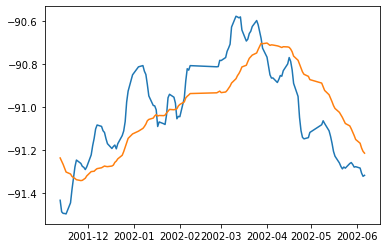

In [97]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(ma5[50:180])
plt.plot(ma30[50:180])

- 分析数据所有金叉和死叉的日期
    - 如果短时间的指标方向拐头向上，并且穿过了较长时间的指标线，这种状态叫“金叉”
    - 如果短时间的指标方向拐头向下，并且穿过了较长时间的指标线，这种状态叫“死叉”

In [98]:
ma5 = ma5[30:]
ma30 = ma30[30:]

In [99]:
s1 = ma5 < ma30
s2 = ma5 > ma30

In [100]:
df = df[30:]

In [101]:
death_ex = s1 & s2.shift(1) #判定死叉的条件
df.loc[death_ex] #死叉对应的行数据
death_date = df.loc[death_ex].index

In [102]:
death_date

DatetimeIndex(['2002-01-17', '2002-01-30', '2002-03-29', '2002-07-29',
               '2002-12-27', '2003-03-17', '2003-04-22', '2003-06-20',
               '2003-06-30', '2003-08-04',
               ...
               '2020-03-18', '2020-08-10', '2020-09-21', '2020-10-27',
               '2021-03-01', '2021-04-15', '2021-05-06', '2021-06-22',
               '2021-11-04', '2022-01-06'],
              dtype='datetime64[ns]', name='date', length=104, freq=None)

In [103]:
golden_date = ~(s1 | s2.shift(1)) #判定金叉的条件
golden_date = df.loc[golden_ex].index #金叉的时间

In [104]:
golden_date

DatetimeIndex(['2001-11-22', '2002-01-24', '2002-02-04', '2002-06-21',
               '2002-12-05', '2003-01-16', '2003-04-15', '2003-05-30',
               '2003-06-24', '2003-07-14',
               ...
               '2020-03-03', '2020-04-02', '2020-08-19', '2020-10-14',
               '2020-11-05', '2021-04-02', '2021-04-16', '2021-05-20',
               '2021-09-16', '2021-11-23'],
              dtype='datetime64[ns]', name='date', length=104, freq=None)

- 如果我从2010年1月1日开始，初始资金为100000元，金叉尽量买入，死叉全部卖出，则到今天为止，我的炒股收益率如何
- 分析：
    - 买卖股票的单价是开盘价
    - 买卖股票的时机
    - 最终手里会有剩余的股票没有卖出去
        - 会有。如果最后一天为金叉，则买入股票。估量剩余股票的价值计算到总收益。
            - 剩余股票的单价就是用最后一天的收盘价。

In [105]:
s1 = Series(data=1,index=golden_date) #1作为金叉的标识
s2 = Series(data=0,index=death_date) #0作为死叉的标识

s = s1.append(s2)
s = s.sort_index() #储存的是金叉和死叉对应的时间

In [106]:
s = s['2010':'2020'] #储存的是金叉和死叉对应的时间

In [152]:
first_money = 100000 #本金，不变
money = first_money #可变的，买股票花的钱和卖股票收入的钱都从该变量中进行操作
hold = 0 #持有股票的数量（股数：100股=1手）

for i in range(len(s)): #i表示的s这个Series中的隐式索引
    #i=0(死叉：卖)=1（金叉：买）
    if s[i] == 1: #金叉的时间
        #基于100000的本金尽可能多的去买入股票
        #获取股票的单价（金叉时间对应的行数据中的开盘价）
        time = s.index[i] #金叉的时间
        p = df.loc[time]['open'] #股票的单价
        hand_count = money//(p*100) #使用100000最多买入多少手股票
        hold = hand_count * 100
        
        money -= (hold * p) #将买股票花的钱从money中减去
    else:
        #将买入的股票卖出去
        death_time = s.index[i]
        p_death = df.loc[death_time]['open'] #卖股票的单价
        money += (p_death * hold) #卖出的股票收入加入到money
        hold = 0
        #找出卖出股票的单价

#如何判断最后一天为金叉还是死叉
last_money = hold * df['close'][-1]

#总收益
money + last_money - first_money

33830228.699999996

In [141]:
s.index[10]

Timestamp('2010-11-10 00:00:00')

In [158]:
df.tail(10)

,open,close,high,low,volume,code
date,,,,,,
2022-03-03,1845.80,1800.00,1850.25,1794.00,31547.0,600519
2022-03-04,1772.00,1780.50,1792.89,1755.10,31047.0,600519
2022-03-07,1760.20,1707.00,1768.00,1703.80,49156.0,600519
2022-03-08,1759.98,1753.20,1786.66,1732.00,57215.0,600519
2022-03-09,1764.10,1779.18,1805.00,1721.11,56434.0,600519
2022-03-10,1808.00,1794.43,1821.00,1791.00,36462.0,600519
2022-03-11,1766.00,1769.01,1777.00,1718.08,47727.0,600519
2022-03-14,1730.00,1700.00,1750.00,1700.00,49007.0,600519
2022-03-15,1650.00,1603.00,1685.00,1603.00,89056.0,600519
